In [2]:
import time
import random
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Tambah batas rekursi agar tidak error untuk ukuran matrix menengah
sys.setrecursionlimit(10000)

In [4]:
# -------------------------------------------------------
# Generate matrix 2D berisi nama barang (dummy)
# -------------------------------------------------------
def generate_matrix(rows, cols):
    items = ["Buku", "Meja", "CPU", "Keyboard", "Mouse", "Monitor",
             "Kursi", "Kabel", "Lampu", "Paku"]
    return [[random.choice(items) for _ in range(cols)] for _ in range(rows)]

In [5]:
# -------------------------------------------------------
# Algoritma Pencarian Iteratif
# -------------------------------------------------------
def search_iterative(matrix, target):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == target:
                return (i, j)
    return None

In [6]:
# -------------------------------------------------------
# Algoritma Pencarian Rekursif
# -------------------------------------------------------
def search_recursive(matrix, target, row=0, col=0):
    rows = len(matrix)
    cols = len(matrix[0])

    if row >= rows:
        return None

    if matrix[row][col] == target:
        return (row, col)

    # pindah kolom
    if col < cols - 1:
        return search_recursive(matrix, target, row, col + 1)
    else:
        # pindah ke baris berikutnya
        return search_recursive(matrix, target, row + 1, 0)

In [7]:
# -------------------------------------------------------
# Fungsi Mengukur Runtime
# -------------------------------------------------------
def measure_runtime(matrix, target):
    # Iteratif
    start = time.time()
    search_iterative(matrix, target)
    iter_time = time.time() - start

    # Rekursif
    start = time.time()
    search_recursive(matrix, target)
    rec_time = time.time() - start

    return iter_time, rec_time

In [8]:
# -------------------------------------------------------
# MAIN PROGRAM
# -------------------------------------------------------
import sys
sys.setrecursionlimit(100000) # Set recursion limit higher than n*n (300*300 = 90000) to avoid RecursionError

if __name__ == "__main__":
    sizes = [10, 50, 100, 200, 300]

    print("Perbandingan Runtime Iteratif vs Rekursif\n")

    for n in sizes:
        print(f"Ukuran Matriks: {n} x {n}")

        matrix = generate_matrix(n, n)

        # Taruh target di posisi paling akhir (worst case)
        target = "TARGET_ITEM"
        matrix[n-1][n-1] = target

        iter_t, rec_t = measure_runtime(matrix, target)

        print(f"  Iteratif : {iter_t:.6f} detik")
        print(f"  Rekursif : {rec_t:.6f} detik\n")

Perbandingan Runtime Iteratif vs Rekursif

Ukuran Matriks: 10 x 10
  Iteratif : 0.000012 detik
  Rekursif : 0.000073 detik

Ukuran Matriks: 50 x 50
  Iteratif : 0.000142 detik
  Rekursif : 0.002228 detik

Ukuran Matriks: 100 x 100
  Iteratif : 0.000674 detik
  Rekursif : 0.005395 detik

Ukuran Matriks: 200 x 200
  Iteratif : 0.002659 detik
  Rekursif : 0.021373 detik

Ukuran Matriks: 300 x 300
  Iteratif : 0.006027 detik
  Rekursif : 0.063180 detik



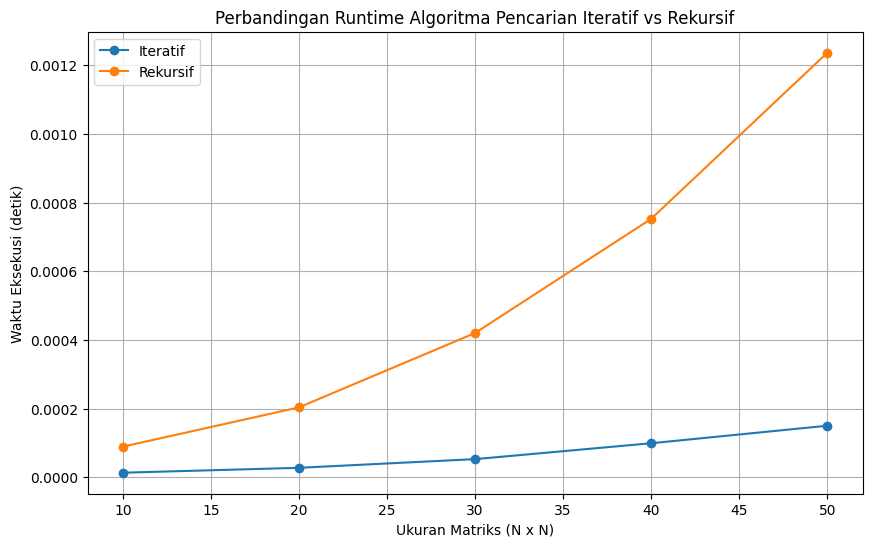

In [9]:
# -------------------------------------------------------
# Eksekusi dan Plot Grafik
# -------------------------------------------------------
sizes = [10, 20, 30, 40, 50]   # agar rekursif tidak error
iter_times = []
rec_times = []

for n in sizes:
    matrix = generate_matrix(n, n)
    matrix[n-1][n-1] = "TARGET_ITEM"   # worst-case

    iter_t, rec_t = measure_runtime(matrix, "TARGET_ITEM")
    iter_times.append(iter_t)
    rec_times.append(rec_t)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sizes, iter_times, marker='o', label="Iteratif")
plt.plot(sizes, rec_times, marker='o', label="Rekursif")
plt.xlabel("Ukuran Matriks (N x N)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Runtime Algoritma Pencarian Iteratif vs Rekursif")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# -------------------------------------------------------
# Membuat Tabel Performance Comparison
# -------------------------------------------------------

performance_data = []

for n in sizes:
    matrix = generate_matrix(n, n)
    matrix[n-1][n-1] = "TARGET_ITEM"  # worst-case

    iter_t, rec_t = measure_runtime(matrix, "TARGET_ITEM")

    performance_data.append({
        "Ukuran Matriks (N x N)": f"{n} x {n}",
        "Jumlah Elemen (n²)": n * n,
        "Runtime Iteratif (detik)": iter_t,
        "Runtime Rekursif (detik)": rec_t,
        "Kompleksitas Iteratif": "O(n²)",
        "Kompleksitas Rekursif": "O(n²)"
    })

# Konversi ke DataFrame
df_performance = pd.DataFrame(performance_data)

# Tampilkan tabel
df_performance


,Ukuran Matriks (N x N),Jumlah Elemen (n²),Runtime Iteratif (detik),Runtime Rekursif (detik),Kompleksitas Iteratif,Kompleksitas Rekursif
0,10 x 10,100,0.000011,0.000086,O(n²),O(n²)
1,20 x 20,400,0.000032,0.000180,O(n²),O(n²)
2,30 x 30,900,0.000069,0.000422,O(n²),O(n²)
3,40 x 40,1600,0.000105,0.000777,O(n²),O(n²)
4,50 x 50,2500,0.000157,0.001361,O(n²),O(n²)
